In [2]:
from climtools import climtools_lib as ctl
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pickle

No DISPLAY variable set. Switching to agg backend


In [5]:
Index_MonthRM, freqs, power_spec, stdT_MonthRM, std100_MonthRM, stdRM_MonthRM = pickle.load(open('/home/montanarini/output/Task-5/Variables/Task-5_Dataset-hist.p', 'rb'))

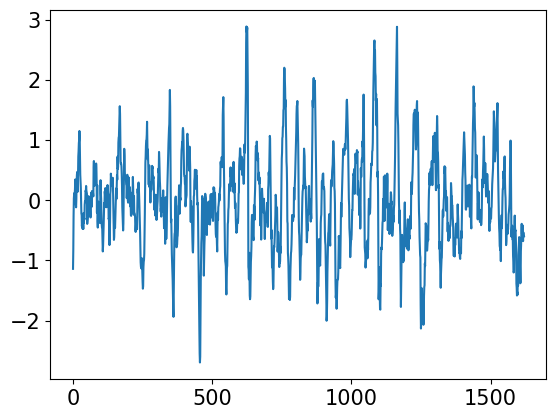

In [21]:
plt.plot(Index_MonthRM)

In [6]:
len(Index_MonthRM)/12

135.08333333333334

In [7]:
cart_out = '/home/fabiano/Research/abstractsepapers/tesi/tesi_alemont/'

In [8]:
# # read thetao
# thetao = xr.open_mfdataset('/nas/BOTTINO/CMIP6/LongRunMIP/EC-Earth-Consortium/EC-Earth3/historical/r4i1p1f1/Omon_r25/thetao/*nc')
# thetaok = thetao.sel(lat=slice(-5,5), lon=slice(120,290))
# thet = thetaok.compute()
# thet.to_netcdf(cart_out + 'thet_hist.nc')

In [39]:
thet = xr.open_dataset(cart_out + 'thet_hist.nc')

In [40]:
thet_ok = thet.mean('lat')
thet_clim = thet_ok.groupby('time.month').mean('time')

thet_anom = thet_ok.groupby('time.month') - thet_clim

In [41]:
thet_anom

<xarray.Dataset>
Dimensions:   (time: 1980, lon: 69, lev: 75, bnds: 2)
Coordinates:
  * time      (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon       (lon) float64 120.0 122.5 125.0 127.5 ... 282.5 285.0 287.5 290.0
  * lev       (lev) float64 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lev_bnds  (time, lev, bnds) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    thetao    (time, lev, lon) float32 -0.6114 -0.5847 -0.6797 ... nan nan nan

In [11]:
oknino = Index_MonthRM > 0.4

In [32]:
thet_clim

<xarray.Dataset>
Dimensions:   (lon: 21, lev: 75, month: 12, bnds: 2)
Coordinates:
  * lon       (lon) float64 190.0 192.5 195.0 197.5 ... 232.5 235.0 237.5 240.0
  * lev       (lev) float64 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: bnds
Data variables:
    lev_bnds  (month, lev, bnds) float64 0.0 1.024 1.024 ... 5.8e+03 6.004e+03
    thetao    (month, lev, lon) float32 28.24 28.08 27.94 27.8 ... nan nan nan

In [42]:
thet_cut = thet_anom.sel(time = Index_MonthRM.time)

In [28]:
thet_cut

<xarray.Dataset>
Dimensions:   (time: 1621, lon: 21, lev: 75, bnds: 2)
Coordinates:
  * time      (time) datetime64[ns] 1865-01-16T12:00:00 ... 2000-01-16T12:00:00
  * lon       (lon) float64 190.0 192.5 195.0 197.5 ... 232.5 235.0 237.5 240.0
  * lev       (lev) float64 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12 1
Dimensions without coordinates: bnds
Data variables:
    lev_bnds  (time, lev, bnds) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    thetao    (time, lev, lon) float32 -0.9518 -0.8494 -1.061 ... nan nan nan

In [43]:
nino_comp = xr.where(Index_MonthRM > 0.4, thet_cut, np.nan).mean('time')

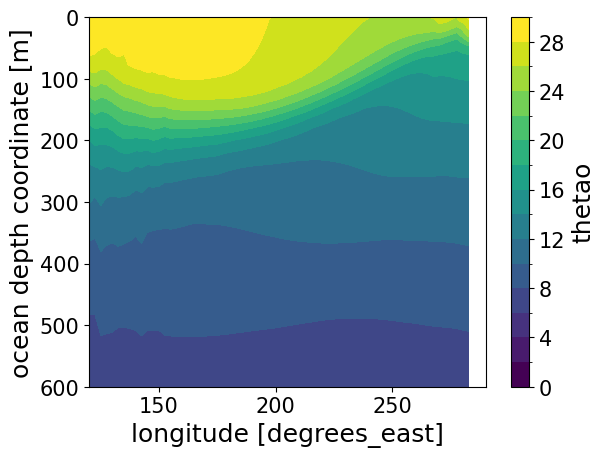

In [44]:
fig = plt.figure()
thet_clim['thetao'].mean('month').plot.contourf(x = 'lon', y ='lev', levels = 17, ylim = (600., 0.))
plt.savefig(cart_out + 'thetao_clim.pdf')

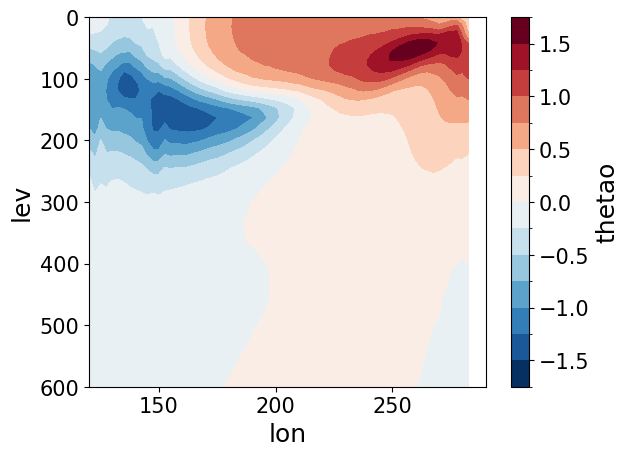

In [45]:
fig = plt.figure()
nino_comp['thetao'].plot.contourf(x = 'lon', y ='lev', levels = 17, ylim = (600., 0.))
plt.savefig(cart_out + 'nino_comp.pdf')

### leggo files di Ale

In [49]:
import pandas

In [50]:
gigi = pickle.load(open('/home/montanarini/output/Task-7/Variables/old/Task-7-hist.p', 'rb'))
gigi2 = pickle.load(open('/home/montanarini/output/Task-7/Variables/prova-hist.p', 'rb'))


ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'